In [52]:
import numpy as np
from matplotlib import pyplot as pt
import pandas as pd
import sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

In [53]:
data = pd.read_csv('training.csv')
print(data.shape)
data.head(5)

(250000, 33)


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [54]:
data = data.drop(['DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'], axis = 1)
data.head(5)

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,...,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,...,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,3.148,9.336,197.814,3.776,1.414,...,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,...,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,...,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000,6.245333,b


In [55]:
from sklearn.model_selection import train_test_split
X = data.drop(['Label'], axis = 1)
Y = data['Label']
X_int_train, X_test, y_int_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)
X_train, X_crossvalid, y_train, y_crossvalid = train_test_split(X_int_train, y_int_train, test_size = 0.33, random_state = 42) 
print(X_train.shape)
print(X_crossvalid.shape)
print(X_test.shape)

(125625, 22)
(61875, 22)
(62500, 22)


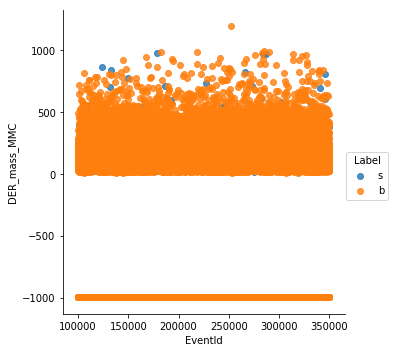

In [74]:
import seaborn as sns

sns.lmplot('EventId', 'DER_mass_MMC', data, hue='Label', fit_reg = False)
pt.show()

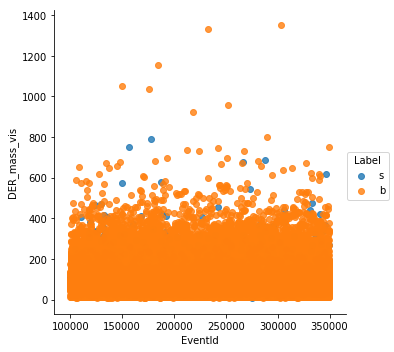

In [75]:
sns.lmplot('EventId', 'DER_mass_vis', data, hue='Label', fit_reg=False)
pt.show()

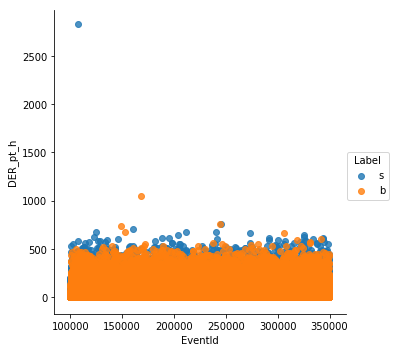

In [76]:
sns.lmplot('EventId', 'DER_pt_h', data, hue='Label', fit_reg=False)
pt.show()

In [56]:
#using Gaussian Naive Bayes Classifier
def Naive_Bayes_classifier(X_train, X_test, y_train, y_test):
    print("Using Gaussian Naive Bayes Classifier: ")
    clf = GaussianNB()
    start_time = time.time()
    model = clf.fit(X_train, y_train)
    print("Training time: " + str(time.time() - start_time) + " seconds")
    print("training accuracy: " + str(model.score(X_train, y_train)*100))

    y_pred = model.predict(X_test)
    print("test accuracy: " + str(accuracy_score(y_pred, y_test)*100))

In [57]:
Naive_Bayes_classifier(X_train, X_crossvalid, y_train, y_crossvalid)

Using Gaussian Naive Bayes Classifier: 
Training time: 0.3109400272369385 seconds
training accuracy: 75.84079601990051
test accuracy: 75.77050505050505


In [58]:
#using Support Vector Machines
from sklearn.svm import SVC
def support_vector_machine_classifier(X_train, X_test, y_train, y_test):
    print("Using Support Vector Machine: ")
    clf = SVC(kernel = "rbf")
    start_time = time.time()
    model = clf.fit(X_train, y_train)
    print("Training time: " + str((time.time() - start_time)/60) + " minutes")
    print("training accuracy: " + str(model.score(X_train, y_train)*100))

    y_pred = model.predict(X_test)
    print("test accuracy: " + str(accuracy_score(y_pred, y_test)*100))

In [59]:
support_vector_machine_classifier(X_train, X_crossvalid, y_train, y_crossvalid)

Using Support Vector Machine: 
Training time: 119.96454663674037 minutes
training accuracy: 100.0
test accuracy: 65.50949494949495
